In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Sat Aug 27 16:54:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## I. Download Dataset

### 1.1 OCR_Dataset
https://github.com/pbcquoc/vietocr

In [ ]:
# ! gdown https://drive.google.com/uc?id=1T0cmkhTgu3ahyMIwGZeby612RpVdDxOR
# ! unzip -qq -o ./ocr_dataset.zip -d datasetOCR

In [ ]:
%cd /content
!git clone https://github.com/thangquocdang/datasetOCR.git

/content
Cloning into 'datasetOCR'...
remote: Enumerating objects: 1184960, done.
remote: Counting objects: 100% (386491/386491), done.
remote: Compressing objects: 100% (267697/267697), done.
remote: Total 1184960 (delta 1416), reused 386490 (delta 1415), pack-reused 798469
Receiving objects: 100% (1184960/1184960), 7.03 GiB | 28.69 MiB/s, done.
Resolving deltas: 100% (1482/1482), done.
Checking out files: 100% (1202564/1202564), done.


In [ ]:
%cd /content
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 124MB/s]


### 1.2 Vietnamese_Dataset
https://github.com/VinAIResearch/dict-guided#dataset

Input format: x1,y1,x2,y2,x3,y3,x4,y4,TRANSCRIPT

In [ ]:
# %cd /content/drive/MyDrive/QNAI_T/Dataset
# !gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
# !unzip vietnamese_original.zip

### 1.3 QNAI Dataset

In [ ]:
# %cd /content/drive/MyDrive/QNAI_T/Dataset
# !gdown https://drive.google.com/uc?id=1dpbsK9bNklcE4FQ7WuEvT6wHo48ARM9y
# !unzip AI_Hackathon_Problem1.zip

## II. Clone Code PaddleOCR

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 39657, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 39657 (delta 44), reused 30 (delta 16), pack-reused 39554
Receiving objects: 100% (39657/39657), 320.79 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (27729/27729), done.
Checking out files: 100% (1281/1281), done.


## III. Install Enviroment

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!pip install -r requirements.txt
!pip install paddlepaddle-gpu 
!pip install PyYAML==5.4.1
!pip3 install paddleslim==2.2.2
!pip install split-folders
!pip3 install lanms-nova

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 604 kB 5.1 MB/s 
     |████████████████████████████████| 4.9 MB 58.4 MB/s 
     |████████████████████████████████| 2.2 MB 56.0 MB/s 
     |████████████████████████████████| 204 kB 76.4 MB/s 
     |████████████████████████████████| 104 kB 76.0 MB/s 
     |████████████████████████████████| 399 kB 52.5 MB/s 
     |████████████████████████████████| 2.3 MB 53.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.0 MB 23 kB/s 
     |████████████████████████████████| 394 kB 57.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: P

## V. Text Recognition

Text Recognition: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/recognition_en.md

### 5.1 Image Processing

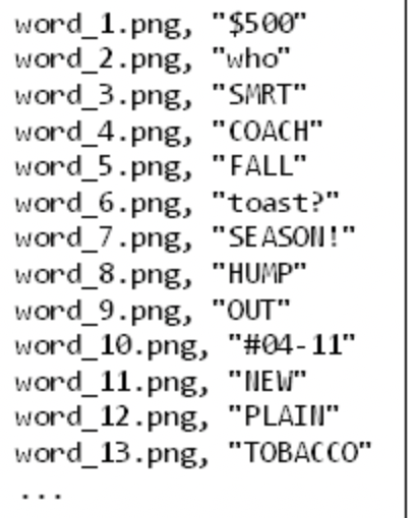

#### 5.1.1 Vietnamese_Data

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_label.txt','w')
with open('/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/train_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/train_images'):
    os.makedirs('/content/dataset_crop/train_images') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR


In [ ]:
import os
import cv2

with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/crop_label.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/train_images')

print(len(lines))
print(len(files))

25794
25794


In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_test_label.txt','w')
with open('/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/test_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/test_image'):
    os.makedirs('/content/dataset_crop/test_image') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR


In [ ]:
import os

with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/crop_test_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/test_image')

print(len(lines))
print(len(files))

7220
7220


In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_unseen_label.txt','w')
with open('/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/useen_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/unseen_test_images'):
    os.makedirs('/content/dataset_crop/unseen_test_images') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR


In [ ]:
import os

with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/crop_unseen_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/unseen_test_images')

print(len(lines))
print(len(files))

10086
10086


#### Data_Menu_Label_Sentences

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/train_images_menu/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format('train_images_menu/'+crop_name, text[bno]))
          cv2.waitKey(10)

crop_label = open('/content/dataset_crop/crop_label_menu.txt','w')
with open('/content/drive/MyDrive/QNAI_T/Dataset/AI Hackathon-Problem1/label_sentences.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/drive/MyDrive/QNAI_T/Dataset/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/train_images_menu'):
    os.makedirs('/content/dataset_crop/train_images_menu') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR


In [ ]:
import os

with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/crop_label_menu.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/train_images_menu')

print(len(lines))
print(len(files))

10258
10258


#### Data_Menu_Label_Char

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/train_images_char/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format('train_images_char/'+crop_name, text[bno]))
          cv2.waitKey(100)

crop_label = open('/content/dataset_crop/crop_label_char.txt','w')
with open('/content/drive/MyDrive/QNAI_T/Dataset/AI Hackathon-Problem1/label_char.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/drive/MyDrive/QNAI_T/Dataset/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/train_images_char'):
    os.makedirs('/content/dataset_crop/train_images_char') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR


In [ ]:
import os

with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/crop_label_char.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/train_images_char')

print(len(lines))
print(len(files))

14729
11383


#### Split Data

In [ ]:
import glob 
import json
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
def split_txt_file(path):
  with open(path, 'r') as f:
    lines = f.readlines()

  list_label_train, list_label_val = train_test_split(lines, test_size=0.2, shuffle=True)
  # list_label_train, list_label_test = train_test_split(list_label, test_size=0.2, shuffle=True)

  train_path = '/content/dataset_crop/train_' + path.split('/')[-1]
  # test_path = '/content/dataset_crop/test_' + path.split('/')[-1]
  val_path = '/content/dataset_crop/val_' + path.split('/')[-1]

  # with open(test_path, 'w') as fi:
  #     for line in list_label_test:
  #         fi.write(line)

  with open(train_path, 'w') as fi:
      for line in list_label_train:
          fi.write(line)
  
  with open(val_path, 'w') as fi:
      for line in list_label_val:
          fi.write(line)

def create_txt_file(folder_path, tail_image_file='.jpg'):
  path = folder_path + '.txt'
  txt_files = glob.glob(folder_path + '/*.txt')
  new_file = open(path, "w")

  for file in txt_files:
    with open(file, 'r') as f:
      line = f.read()
    label_name = os.path.basename(file).split('.')[0]
    img_name = folder_path.split('/')[-1] + '/' + label_name + tail_image_file
    new_file.write("{0}\t{1}\n".format(img_name, line))

  split_txt_file(path)

In [ ]:
with open('/content/datacrop.txt', 'w') as crop:
  txt_files = glob.glob('/content/dataset_crop/*.txt')
  for txt_file in txt_files:
    with open(txt_file, 'r') as f:
      lines=f.readlines()
    
    print(len(lines))
    for line in lines:
      crop.write(line)

with open('/content/datacrop.txt','r') as f:
  lines=f.readlines()

print('----------------------------')
len(lines)

10086
7220
14729
25794
10258
----------------------------


68087

In [ ]:
split_txt_file('/content/datacrop.txt')

In [ ]:
with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/train_datacrop.txt','r') as f:
  lines=f.readlines()

len(lines)

54469

In [ ]:
with open('/content/drive/MyDrive/QNAI_T/Dataset/dataset_crop/val_datacrop.txt','r') as f:
  lines=f.readlines()

len(lines)

13618

#### 5.1.2 OCR_Dataset

In [ ]:
import glob 
import json
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
def split_txt_file(path):
  with open(path, 'r') as f:
    lines = f.readlines()

  list_label_train, list_label_val = train_test_split(lines, test_size=0.2, shuffle=True)
  # list_label_train, list_label_test = train_test_split(list_label, test_size=0.2, shuffle=True)

  train_path = '/content/drive/MyDrive/QNAI_T/E2E/PPOCR/dataOCR/train_' + path.split('/')[-1]
  # test_path = '/content/drive/MyDrive/QNAI_T/E2E/PPOCR/dataOCR/test_' + path.split('/')[-1]
  val_path = '/content/drive/MyDrive/QNAI_T/E2E/PPOCR/dataOCR/val_' + path.split('/')[-1]

  # with open(test_path, 'w') as fi:
  #     for line in list_label_test:
  #         fi.write(line)

  with open(train_path, 'w') as fi:
      for line in list_label_train:
          fi.write(line)
  
  with open(val_path, 'w') as fi:
      for line in list_label_val:
          fi.write(line)

def create_txt_file(folder_path, tail_image_file='.jpg'):
  path = folder_path + '.txt'
  txt_files = glob.glob(folder_path + '/*.txt')
  new_file = open(path, "w")

  for file in txt_files:
    with open(file, 'r') as f:
      line = f.read()
    label_name = os.path.basename(file).split('.')[0]
    img_name = folder_path.split('/')[-1] + '/' + label_name + tail_image_file
    new_file.write("{0}\t{1}\n".format(img_name, line))

  split_txt_file(path)

In [ ]:
folder_paths = '/content/datasetOCR'
folder_path = glob.glob(folder_paths + '/*')
path_new_file = '/content/drive/MyDrive/QNAI_T/E2E/PPOCR/dataOCR/dataocr.txt'
new_file = open(path_new_file, "w")

for folder in folder_path:
  # if folder == '/content/datasetOCR/random':
  #   continue
  if folder == '/content/datasetOCR/InkData_line_processed':
    tail_image_file='.png'
  else:   
    tail_image_file='.jpg'

  txt_files = glob.glob(folder + '/*.txt')
  for file in txt_files:
    with open(file, 'r') as f:
      lines = f.readlines()

    label_name = os.path.basename(file).split('.')[0]
    img_name = folder.split('/')[-1] + '/' + label_name + tail_image_file
    for line in lines:
      new_file.write("{0}\t{1}\n".format(img_name, line.rstrip()))

split_txt_file(path_new_file)

### 5.2 Dictionary

In [ ]:
# !cp /content/drive/MyDrive/QNAI_T/Dataset/vietnamese/vn_dictionary.txt /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR/ppocr/utils/dict

### 5.3 Download Pretrained Model

#### 5.3.1 Normal

In [ ]:
# %cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
# # Download the pre-trained model of en_PP-OCRv3
# !wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

# # Decompress model parameters
# %cd pretrain_models
# !tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar

#### 5.3.2 Quantization

##### PPOCR-V3

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_slim_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_slim_train.tar && rm -rf en_PP-OCRv3_rec_slim_train.tar

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR
--2022-08-10 14:24:42--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_slim_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201349120 (192M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_slim_train.tar’

en_PP-OCRv3_rec_sli 100%[===================>] 192.02M  11.2MB/s    in 39s     

2022-08-10 14:25:23 (4.92 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_slim_train.tar’ saved [201349120/201349120]

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/pretrain_models


##### SVTR

In [ ]:
# %cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR
# # Download the pre-trained model of en_PP-OCRv3
# !wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/rec_svtr_tiny_none_ctc_en_train.tar

# # Decompress model parameters
# %cd pretrain_models
# !tar -xf rec_svtr_tiny_none_ctc_en_train.tar && rm -rf rec_svtr_tiny_none_ctc_en_train.tar

##### ABINet

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/rec_r45_abinet_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf rec_r45_abinet_train.tar && rm -rf rec_r45_abinet_train.tar

### 5.4 Training

#### 5.4.1 Training

##### Normal

###### SVTR

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_svtrnet_custom.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/rec_svtr_tiny_none_ctc_en_train/best_accuracy \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/svtr

###### PPOCR-V3

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom_VinAI_menu_dict_ver2.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
  Global.character_dict_path=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/dictionary/ppocr_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/final/ppocrv3_VinAI_menu_dict

Streaming output truncated to the last 5000 lines.
[2022/08/28 00:00:42] ppocr INFO: epoch: [44/120], global_step: 37140, lr: 0.000765, acc: 0.710937, norm_edit_dis: 0.876609, CTCLoss: 2.028761, SARLoss: 0.846775, loss: 2.846566, avg_reader_cost: 0.00331 s, avg_batch_cost: 0.58985 s, avg_samples: 64.0, ips: 108.50207 samples/s, eta: 11:38:24
[2022/08/28 00:00:50] ppocr INFO: epoch: [44/120], global_step: 37150, lr: 0.000765, acc: 0.734375, norm_edit_dis: 0.880272, CTCLoss: 1.773170, SARLoss: 0.833986, loss: 2.580517, avg_reader_cost: 0.08329 s, avg_batch_cost: 0.81629 s, avg_samples: 64.0, ips: 78.40362 samples/s, eta: 11:38:20
[2022/08/28 00:00:56] ppocr INFO: epoch: [44/120], global_step: 37160, lr: 0.000765, acc: 0.718750, norm_edit_dis: 0.887330, CTCLoss: 1.829880, SARLoss: 0.860380, loss: 2.678295, avg_reader_cost: 0.00475 s, avg_batch_cost: 0.60528 s, avg_samples: 64.0, ips: 105.73570 samples/s, eta: 11:38:13
[2022/08/28 00:01:01] ppocr INFO: epoch: [44/120], global_step: 37170, 

##### Quantization

###### PPOCR-V3

####### VinAI #######

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom_VinAI_new_dict.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/rec/ppocrv3_quant_VinAI_new_dict

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
2022-08-24 08:25:14,294-WARNING: type object 'QuantizationTransformPass' has no attribute '_supported_quantizable_op_type'
2022-08-24 08:25:14,295-WARNING: If you want to use training-aware and post-training quantization, please use Paddle >= 1.8.4 or develop version
[2022/08/24 08:25:14] ppocr INFO: Architecture : 
[2022/08/24 08:25:14] ppocr INFO:     Backbone : 
[2022/08/24 08:25:14] ppocr INFO:         last_conv_stride : [1, 2]
[2022/08/24 08:25:14] ppocr INFO:         last_pool_type : avg
[2022/08/24 08:25:14] ppocr INFO:         name : MobileNetV1Enhance
[2022/08/24 08:25:14] ppocr INFO:         scale : 0.5
[2022/08/24 08:25:14] ppocr INFO:     Head : 
[2022/08/24 08:25:14] ppocr INFO:         head_list : 
[2022/08/24 08:25:14] ppocr INFO:             CTCHead : 
[2022/08/24 08:25:14] ppocr INFO:                 Head : 
[2022/08/24 08:25:14] ppocr INFO:                     fc_decay 

####### VietOCR #######

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/ppocrv3_quant

###### SVTR

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_svtrnet_custom.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/rec_svtr_tiny_none_ctc_en_train/best_accuracy \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/svtr_quant

###### ABINet

In [ ]:
# %cd /content/drive/MyDrive/QNAI_T/E2E
# !git clone --branch dygraph https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/drive/MyDrive/QNAI_T/E2E/PaddleOCR
!pip install -r requirements.txt

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_abinet_custom.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/pretrain_models/rec_r45_abinet_train/best_accuracy \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/abinet_quant

#### 5.4.2 Load Trained Model and Continue Training

##### Normal

###### PPOCR-V3

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom_VinAI_menu_dict_ver2.yml \
 -o Global.checkpoints=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/final/ppocrv3_VinAI_menu_dict_ver2/latest \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/final/ppocrv3_VinAI_menu_dict_ver2

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
[2022/08/27 10:24:02] ppocr INFO: Architecture : 
[2022/08/27 10:24:02] ppocr INFO:     Backbone : 
[2022/08/27 10:24:02] ppocr INFO:         last_conv_stride : [1, 2]
[2022/08/27 10:24:02] ppocr INFO:         last_pool_type : avg
[2022/08/27 10:24:02] ppocr INFO:         name : MobileNetV1Enhance
[2022/08/27 10:24:02] ppocr INFO:         scale : 0.5
[2022/08/27 10:24:02] ppocr INFO:     Head : 
[2022/08/27 10:24:02] ppocr INFO:         head_list : 
[2022/08/27 10:24:02] ppocr INFO:             CTCHead : 
[2022/08/27 10:24:02] ppocr INFO:                 Head : 
[2022/08/27 10:24:02] ppocr INFO:                     fc_decay : 1e-05
[2022/08/27 10:24:02] ppocr INFO:                 Neck : 
[2022/08/27 10:24:02] ppocr INFO:                     depth : 2
[2022/08/27 10:24:02] ppocr INFO:                     dims : 64
[2022/08/27 10:24:02] ppocr INFO:                     hidden_dims : 120
[2

##### Quantization

###### PPOCRV3

######## VinAI

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom_VinAI_new_dict.yml \
 -o Global.checkpoints=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/ppocrv3_quant_VinAI_new_dict/latest \
  Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/ppocrv3_quant_VinAI_new_dict

####### VietOCR

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_config/rec_ppocrv3_custom.yml \
 -o Global.checkpoints=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/ppocrv3_quant/latest \
 Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/ppocrv3_quant

Output hidden; open in https://colab.research.google.com to view.

###### SVTR

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/quant.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_svtrnet_custom.yml \
 -o Global.checkpoints=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/svtr_quant/latest \
 Global.save_model_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/outputt/training/svtr_quant

## VI. Evaluation

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/infer_rec.py \
 -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_svtrnet_custom.yml \
 -o Global.pretrained_model=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/training/svtr/best_accuracy \
  Global.infer_img=/content/sample/001063014772.jpeg

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
[2022/08/10 12:07:36] ppocr INFO: Architecture : 
[2022/08/10 12:07:36] ppocr INFO:     Backbone : 
[2022/08/10 12:07:36] ppocr INFO:         depth : [3, 6, 3]
[2022/08/10 12:07:36] ppocr INFO:         embed_dim : [64, 128, 256]
[2022/08/10 12:07:36] ppocr INFO:         img_size : [32, 100]
[2022/08/10 12:07:36] ppocr INFO:         last_stage : True
[2022/08/10 12:07:36] ppocr INFO:         local_mixer : [[7, 11], [7, 11], [7, 11]]
[2022/08/10 12:07:36] ppocr INFO:         mixer : ['Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Global', 'Global', 'Global', 'Global', 'Global', 'Global']
[2022/08/10 12:07:36] ppocr INFO:         name : SVTRNet
[2022/08/10 12:07:36] ppocr INFO:         num_heads : [2, 4, 8]
[2022/08/10 12:07:36] ppocr INFO:         out_channels : 192
[2022/08/10 12:07:36] ppocr INFO:         out_char_num : 25
[2022/08/10 12:07:36] ppocr INFO:         patch_merging :

In [ ]:
#evaluation model detect 
!python3 /content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR/tools/eval.py -c /content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR/configs/det/det_mv3_db.yml \
                       -o Global.checkpoints_model=/content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR/output/db_mv3/latest

In [ ]:
#evaluation model recognition
!python3 /content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR/tools/eval.py -c /content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR/configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml  \
                   -o Global.checkpoints=path_checkpoints \
                      Global.character_type=ch  \
                       Global.character_dict_path=./ppocr/utils/dict/vn_dictionary.txt  

##  VII. Inference với model đã train xong

### 7.1 Text Detection

In [ ]:
!python3 tools/export_model.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model="./output/db_mv3/latest" Global.save_inference_dir="./inference/DB"


In [ ]:
!python3 /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR/tools/infer/predict_det.py --det_algorithm="DB" --use_gpu=True \
                                   --det_model_dir="/content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR/inference/DB"  \
                                   --image_dir=/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/test_image

### 7.2 Text Recognition

#### 7.2.1 Normal

In [ ]:
!python3 tools/export_model.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=./pretrain_models/en_PP-OCRv3_rec_train/best_accuracy  Global.save_inference_dir=./inference/en_PP-OCRv3_rec/

W0726 12:10:23.316360  3497 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.2, Runtime API Version: 10.2
W0726 12:10:23.320899  3497 gpu_resources.cc:91] device: 0, cuDNN Version: 7.6.
[2022/07/26 12:10:24] ppocr INFO: load pretrain successful from ./pretrain_models/en_PP-OCRv3_rec_train/best_accuracy
[2022/07/26 12:10:26] ppocr INFO: inference model is saved to ./inference/en_PP-OCRv3_rec/inference


In [ ]:
!python3 tools/infer/predict_rec.py --image_dir="/content/drive/MyDrive/QNAI_T/Dataset/rec/train_images/im0001_0.jpg" --rec_model_dir="./inference/en_PP-OCRv3_rec" --rec_image_shape="3, 32, 100" --rec_char_dict_path="./ppocr/utils/dict/vn_dictionary.txt"

#### 7.2.2 Quantization

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 deploy/slim/quantization/export_model.py \
        -c /content/drive/MyDrive/QNAI_T/E2E/PPOCR/rec_quanz_custom.yml \
        -o Global.checkpoints=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/quant_model/best_accuracy \
        Global.save_inference_dir=/content/drive/MyDrive/QNAI_T/E2E/PPOCR/output/quant_inference_model

### 7.3 Inference

In [ ]:
!python3 tools/infer_rec.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=./pretrain_models/en_PP-OCRv3_rec_train/best_accuracy  Global.infer_img=/content/drive/MyDrive/QNAI_T/Dataset/rec/train_images/im0001_0.jpg

### 7.4 Kết hợp hai model detection và recognition với nhau:


Tham khảo: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/inference_ppocr_en.md

In [ ]:
%cd /content/drive/MyDrive/QNAI/E2E/PPOCR/PaddleOCR
# not use use direction classifier
!python3 tools/infer/predict_system.py --image_dir="/content/drive/MyDrive/QNAI_T/Dataset/vietnamese/test_image/im1203.jpg" \
                                      --det_model_dir="./inference/DB" \
                                      --rec_model_dir="./inference/en_PP-OCRv3_rec" \
                                      --rec_char_dict_path="./ppocr/utils/dict/vn_dictionary.txt" \
                                      --drop_score=0.7 \
                                      --use_angle_cls=false